In this file I'm going to demonstrate Linear Regression basics with a simple yet a little bit large csv file

In [1]:
path="data/Salary.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#seaborn is another visualization library built on top of matplotlib. It provides more sophisticated and aesthetic statistical graphics.
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Train, test, split ....? data pre-processing, model evaluation, and model selection.
from sklearn.metrics import mean_squared_error, r2_score
#Mean squared error: Measures the average squared difference between predicted and actual values.
#r2 score : Measures the average squared difference between predicted and actual values (lower values indicate better performance in both).

In [3]:
data = pd.read_csv(path)
#read file
data.head()
#head(): This method shows the first 5 rows of the dataset.

,YearsExperience,Salary
0,9.060218,65598.097290
1,18.220733,126086.774327
2,3.112752,66996.365973
3,10.359877,72991.060812
4,1.215719,31015.711414


'\nsns.scatterplot():\n  This function creates a scatter plot,\n  which is useful for visualizing the relationship between two continuous variables.\n\ndata:\n  The dataset you\'ve loaded\n\nx="YearsExperience":\n  column for the x-axis.\n\ny="Salary":\n  column for the y-axis.\n\n'

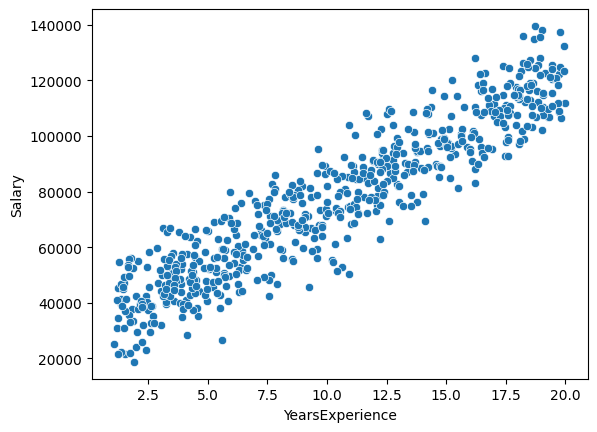

In [21]:
sns.scatterplot(data,x="YearsExperience",y="Salary")
plt.savefig('results/salary_scatter_plot.png')  # Save as PNG

'''
sns.scatterplot():
  This function creates a scatter plot,
  which is useful for visualizing the relationship between two continuous variables.

data:
  The dataset you've loaded

x="YearsExperience":
  column for the x-axis.

y="Salary":
  column for the y-axis.

'''

In [5]:
# !!!!
# Many machine learning algorithms, including those in Scikit-learn, expect data to be in the form of NumPy arrays for efficient computations.
# !!!!


# Create a 1D array from YearsExperience
X = np.array(data["YearsExperience"]).reshape(-1,1)

# Reshape it: -1 here means "make as much columns as u want"
# 1 here means one column pls


Y = np.array(data['Salary']).reshape(-1,1)



In [6]:
'''
The train_test_split function returns four values in a specific order:

Feature Matrix for Training Data
Feature Matrix for Testing Data
Target Vector for Training Data
Target Vector for Testing Data

'''
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,train_size=0.8, random_state=101)



In [7]:
ghost = LinearRegression()
# LinearRegression() creates a linear regression model.
ghost.fit(xtrain, ytrain)

# fit() trains the model by finding the best-fitting coefficients for xtrain and ytrain.

'''
.fit(xtrain, ytrain): Trains the model using the feature matrix (xtrain) and target vector (ytrain).


'''


'\n.fit(xtrain, ytrain): Trains the model using the feature matrix (xtrain) and target vector (ytrain).\n\n\n'

In [8]:
ypred = ghost.predict(xtest)

# Stores predicted Y values using xtest to compare with ytest


In [9]:
'''
mean_squared_error: Computes the average squared difference between ytest and ypred (lower is better).

RMSE: Root of MSE, giving error in the same units as the target (lower is better).

r2_score: Measures how well the model explains the variance in the target. R² ranges from 0 to 1 (1 is a perfect fit).
'''

print(f'''
MSE: {mean_squared_error(ytest, ypred)}
RMSE: {np.sqrt(mean_squared_error(ytest, ypred))}
R2: {r2_score(ytest, ypred)}
''')




MSE: 120079042.18858674
RMSE: 10958.058322010644
R2: 0.8417646244042811



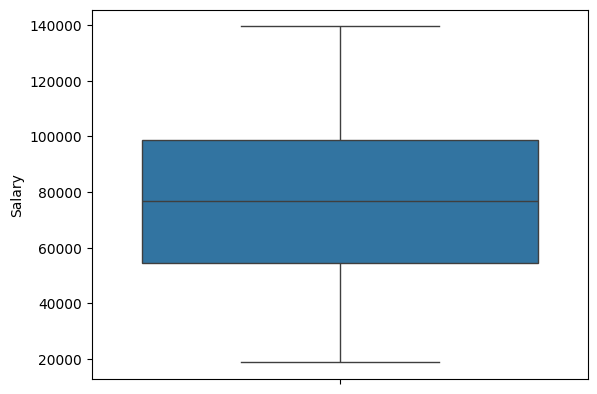

In [22]:
sns.boxplot(data, y="Salary")
plt.savefig('results/salary_box_plot.png')

In [11]:
print(ghost.coef_)
# Coefficient(s): These values represent the slope(s) of the linear regression model.

print(ghost.intercept_)
# Intercept: This value represents the point where the regression line crosses the y-axis.


[[4497.01677737]]
[30870.11310615]


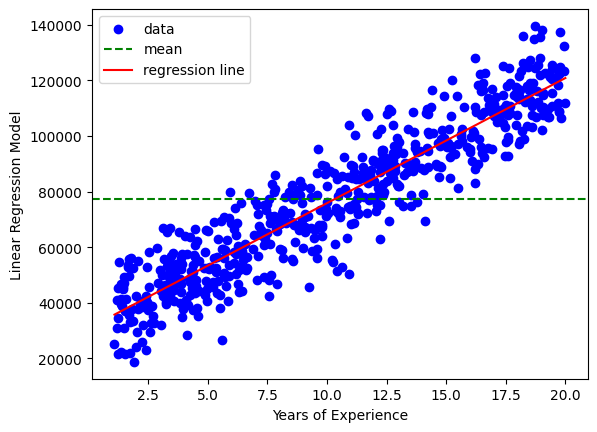

In [30]:
slope = ghost.coef_[0]
# Extracts the slope (coefficient) from the trained model (first feature coefficient).

intercept = ghost.intercept_
# Extracts the intercept (the point where the line crosses the y-axis) from the trained model.


# Generate 100 evenly spaced points between the min and max of X to plot the regression line.
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = slope * X_line + intercept

# Plot the original data points (scatter plot).
plt.scatter(X, Y, color='blue', label='data')

# Plot a horizontal line representing the mean of Y.
plt.axhline(y=Y.mean(), color='green', linestyle='--', label='mean')

# Plot the regression line calculated from the model's slope and intercept.
plt.plot(X_line, y_line, color='red', label='regression line')

# Add labels for X and Y axes.
plt.xlabel('Years of Experience')
plt.ylabel('Linear Regression Model')

# Show the legend and display the plot.
plt.savefig('results/salary_linear_regression.png')
plt.legend()
plt.show()



In [13]:
# Second part

In [14]:
# First we gotta calculate our predictions

ypred = ghost.predict(X)

# Then we can actually calculate our residuals to see which ones are left

residuals = Y - ypred

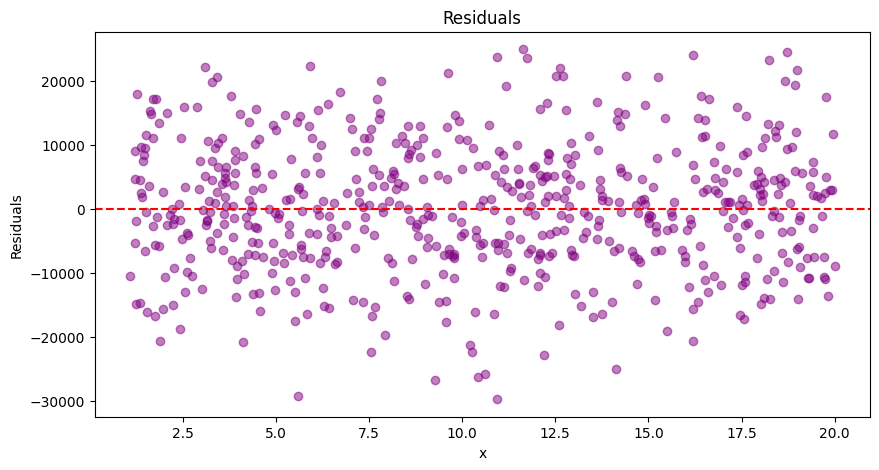

could be valid


In [25]:
# Here we visulaize the residuals 

plt.figure(figsize=(10, 5))
plt.scatter(X, residuals, color = 'purple', alpha=0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.title('Residuals')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.savefig('results/salary_residuals.png')
plt.show()


print("could be valid")

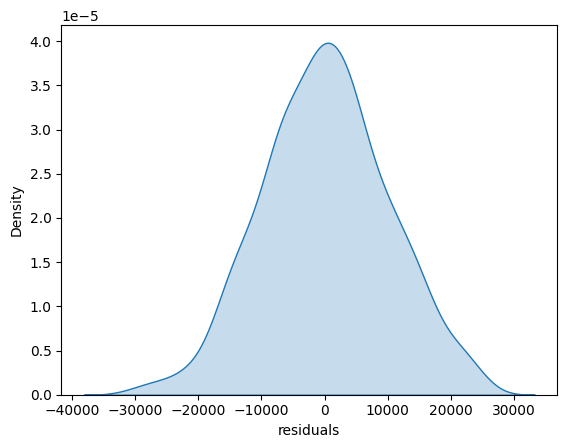

In [29]:


residuals = residuals.reshape(1, -1)
residuals = residuals[0]
res_df = pd.DataFrame({'residuals': residuals})
sns.kdeplot(res_df['residuals'], fill=True)
plt.savefig('results/salary_residuals_density.png')
plt.show()

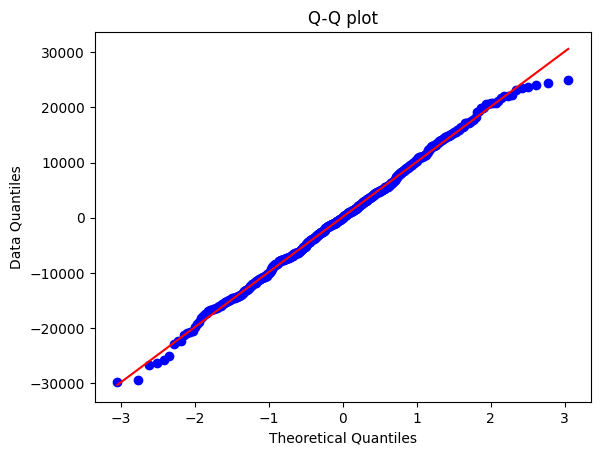

Note: it is highly probable it distributes like a normal 


In [28]:
'''
This function generates a Q-Q plot for the residuals, comparing them to a theoretical normal distribution.

osm (Ordered Sample Moments): Represents the sorted values of your residuals.
osr (Ordered Residuals): These are the quantiles of your residuals.
slope and intercept: These values represent the linear relationship between the theoretical quantiles and your data.
r: The correlation coefficient that shows how well the data fits the line (closer to 1 means a better fit).
'''

(osm, osr), (slope, intercept, r) = stats.probplot(residuals, dist='norm', plot = plt)
plt.title('Q-Q plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Data Quantiles')
plt.savefig('results/salary_data_quantiles.png')
plt.show()

print("Note: it is highly probable it distributes like a normal ")

In [18]:


statistic, p_value = stats.shapiro(residuals)
#This function calculates the Shapiro-Wilk test for normality on the residuals (the differences between the actual and predicted values).
print(f'statistic: {statistic}')
print(f'p value: {p_value}')

alpha = 0.05
if p_value <= alpha:
    print('We reject the null hypothesis, the data does not follow a normal distribution')
else:
    print('We fail to reject the null hypothesis. The data might follow a normal distribution')


statistic: 0.9972043037414551
p value: 0.40125852823257446
We fail to reject the null hypothesis. The data might follow a normal distribution


In [19]:
(x,y)=(1,2)

print(x,y)

1 2
